In [ ]:
import pandas as pd
import http.client
import datetime
import matplotlib.pyplot as plt
import time 

date = datetime.date(2020, 4, 26)
myString = date.strftime("%Y-%m-%d")
myDates = []
myConfirmed = []
myRecovered = []
myDeaths = []
myActive = []

for i in range(50): 
    
    conn = http.client.HTTPSConnection("covid-19-data.p.rapidapi.com")
    headers = {
        'x-rapidapi-key': "ec2df8a3e1mshf054643baca179bp1f330fjsne0b33237817d",
        'x-rapidapi-host': "covid-19-data.p.rapidapi.com"
        }

    conn.request("GET", "/report/country/name?name=germany&date="+myString, headers=headers)

    res = conn.getresponse()
    data = res.read()
    df = pd.read_json(data)
 
    values = df['provinces']
    values[0] #Liste
    myDF = pd.DataFrame(values[0])
    
    confirmed = myDF['confirmed']
    confirmed = confirmed[0]

    recovered = myDF['recovered']
    recovered = recovered[0]

    deaths = myDF['deaths']
    deaths = deaths[0]

    active = myDF['active']
    active = active[0]

    myDates.append(date)
    myConfirmed.append(confirmed)
    myRecovered.append(recovered)
    myDeaths.append(deaths)
    myActive.append(active)
    
    date += datetime.timedelta(days=1)
    myString = date.strftime("%Y-%m-%d")
    
    time.sleep(20)
print(myDates)
print(myConfirmed)
print(myRecovered)
print(myDeaths)
print(myActive)


In [3]:
myValuesDF = pd.DataFrame(list(zip(myDates, myConfirmed, myRecovered, myDeaths, myActive)),
              columns =['Date', 'Confirmed', 'Recovered', 'Deaths', 'Active'])
myValuesDF

,Date,Confirmed,Recovered,Deaths,Active
0,2020-04-26,157770,112000,5976,39794
1,2020-04-27,158758,114500,6126,38132
2,2020-04-28,159912,117400,6314,36198
3,2020-04-29,161539,120400,6467,34672
4,2020-04-30,163009,123500,6623,32886
5,2020-05-01,164077,126900,6736,30441
6,2020-05-02,164967,129000,6812,29155
7,2020-05-03,165664,130600,6866,28198
8,2020-05-04,166152,132700,6993,26459
9,2020-05-05,167007,135100,6993,24914


In [32]:
# writer = pd.ExcelWriter('output.xlsx')
# myValuesDF.to_excel(writer)
# writer.save()
# print('DataFrame is written successfully to Excel File.')


In [31]:
# covidBearbeitet = 'output.xlsx'
# covidNew = pd.read_excel(covidBearbeitet)

# ax = plt.gca()

# covidNew.plot(kind='line',x='Date',y='Confirmed',ax=ax)
# covidNew.plot(kind='line',x='Date',y='Recovered', color='red', ax=ax)
# covidNew.plot(kind='line',x='Date',y='Deaths', color ='yellow', ax=ax)
# covidNew.plot(kind='line',x='Date',y='Active', color='green', ax=ax)

# ax.set_xlabel("Date")
# ax.set_ylabel("Number")

# plt.show()


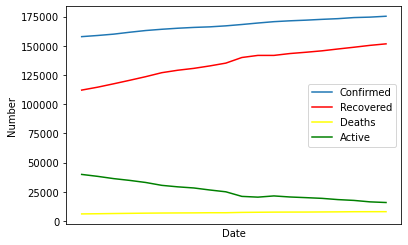

In [30]:
ax = plt.gca()

myValuesDF.plot(kind='line',x='Date',y='Confirmed',ax=ax, xticks=())
myValuesDF.plot(kind='line',x='Date',y='Recovered',color='red',ax=ax, xticks=())
myValuesDF.plot(kind='line',x='Date',y='Deaths',color ='yellow',ax=ax, xticks=())
myValuesDF.plot(kind='line',x='Date',y='Active',color='green',ax=ax, xticks=())

ax.set_xlabel("Date")
ax.set_ylabel("Number")

plt.show()


In [1]:
#Ich möchte jetzt ein gui bauen wo ich eine Graphik generieren lassen kann basierend auf dem land welches man wählt
import tkinter as tk
from tkinter import filedialog, Text
import os
import pandas as pd
import http.client
import datetime
import matplotlib.pyplot as plt
import time 

root = tk.Tk()

def generateFrance():
     
    date = datetime.date(2020, 4, 26)
    myString = date.strftime("%Y-%m-%d")
    myDates = []
    myConfirmed = []
    myRecovered = []
    myDeaths = []
    myActive = []
    
    
    for i in range(50):
    
        conn = http.client.HTTPSConnection("covid-19-data.p.rapidapi.com")
        headers = {
            'x-rapidapi-key': "ec2df8a3e1mshf054643baca179bp1f330fjsne0b33237817d",
            'x-rapidapi-host': "covid-19-data.p.rapidapi.com"
            }

        conn.request("GET", "/report/country/name?name=france&date="+myString, headers=headers)

        res = conn.getresponse()
        data = res.read()
        df = pd.read_json(data)

        values = df['provinces']
        values[0] #Liste
        myDF = pd.DataFrame(values[0])

        confirmed = myDF['confirmed']
        confirmed = confirmed[0]

        recovered = myDF['recovered']
        recovered = recovered[0]

        deaths = myDF['deaths']
        deaths = deaths[0]

        active = myDF['active']
        active = active[0]

        myDates.append(date)
        myConfirmed.append(confirmed)
        myRecovered.append(recovered)
        myDeaths.append(deaths)
        myActive.append(active)

        date += datetime.timedelta(days=1)
        myString = date.strftime("%Y-%m-%d")

        time.sleep(5)
        
    myValuesDF = pd.DataFrame(list(zip(myDates, myConfirmed, myRecovered, myDeaths, myActive)),
               columns =['Date', 'Confirmed', 'Recovered', 'Deaths', 'Active'])
    


    ax = plt.gca()

    myValuesDF.plot(kind='line',x='Date',y='Confirmed',ax=ax, xticks=())
    myValuesDF.plot(kind='line',x='Date',y='Recovered', color='red', ax=ax, xticks=())
    myValuesDF.plot(kind='line',x='Date',y='Deaths', color ='yellow', ax=ax, xticks=())
    myValuesDF.plot(kind='line',x='Date',y='Active', color='green', ax=ax, xticks=())

    ax.set_xlabel("Date")
    ax.set_ylabel("Number")

    plt.show()
  

    

def generateItaly():
    
    date = datetime.date(2020, 4, 26)
    myString = date.strftime("%Y-%m-%d")
    myDates = []
    myConfirmed = []
    myRecovered = []
    myDeaths = []
    myActive = []
    
    
    for i in range(50):
    
        conn = http.client.HTTPSConnection("covid-19-data.p.rapidapi.com")
        headers = {
            'x-rapidapi-key': "ec2df8a3e1mshf054643baca179bp1f330fjsne0b33237817d",
            'x-rapidapi-host': "covid-19-data.p.rapidapi.com"
            }

        conn.request("GET", "/report/country/name?name=italy&date="+myString, headers=headers)

        res = conn.getresponse()
        data = res.read()
        df = pd.read_json(data)

        values = df['provinces']
        values[0] #Liste
        myDF = pd.DataFrame(values[0])

        confirmed = myDF['confirmed']
        confirmed = confirmed[0]

        recovered = myDF['recovered']
        recovered = recovered[0]

        deaths = myDF['deaths']
        deaths = deaths[0]

        active = myDF['active']
        active = active[0]

        myDates.append(date)
        myConfirmed.append(confirmed)
        myRecovered.append(recovered)
        myDeaths.append(deaths)
        myActive.append(active)

        date += datetime.timedelta(days=1)
        myString = date.strftime("%Y-%m-%d")

        time.sleep(5)
        
    myValuesDF = pd.DataFrame(list(zip(myDates, myConfirmed, myRecovered, myDeaths, myActive)),
               columns =['Date', 'Confirmed', 'Recovered', 'Deaths', 'Active'])
    


    ax = plt.gca()

    myValuesDF.plot(kind='line',x='Date',y='Confirmed',ax=ax, xticks=())
    myValuesDF.plot(kind='line',x='Date',y='Recovered', color='red', ax=ax, xticks=())
    myValuesDF.plot(kind='line',x='Date',y='Deaths', color ='yellow', ax=ax, xticks=())
    myValuesDF.plot(kind='line',x='Date',y='Active', color='green', ax=ax, xticks=())

    ax.set_xlabel("Date")
    ax.set_ylabel("Number")

    plt.show()
  

    

def generateGermany():
    
    date = datetime.date(2020, 4, 26)
    myString = date.strftime("%Y-%m-%d")
    myDates = []
    myConfirmed = []
    myRecovered = []
    myDeaths = []
    myActive = []
    
    
    for i in range(50):
        
        conn = http.client.HTTPSConnection("covid-19-data.p.rapidapi.com")
        headers = {
            'x-rapidapi-key': "ec2df8a3e1mshf054643baca179bp1f330fjsne0b33237817d",
            'x-rapidapi-host': "covid-19-data.p.rapidapi.com"
            }

        conn.request("GET", "/report/country/name?name=germany&date="+myString, headers=headers)

        res = conn.getresponse()
        data = res.read()
        df = pd.read_json(data)

        values = df['provinces']
        values[0] #Liste
        myDF = pd.DataFrame(values[0])

        confirmed = myDF['confirmed']
        confirmed = confirmed[0]

        recovered = myDF['recovered']
        recovered = recovered[0]

        deaths = myDF['deaths']
        deaths = deaths[0]

        active = myDF['active']
        active = active[0]

        myDates.append(date)
        myConfirmed.append(confirmed)
        myRecovered.append(recovered)
        myDeaths.append(deaths)
        myActive.append(active)

        date += datetime.timedelta(days=1)
        myString = date.strftime("%Y-%m-%d")

        time.sleep(5)
        
    myValuesDF = pd.DataFrame(list(zip(myDates, myConfirmed, myRecovered, myDeaths, myActive)),
               columns =['Date', 'Confirmed', 'Recovered', 'Deaths', 'Active'])
    

    ax = plt.gca()

    myValuesDF.plot(kind='line',x='Date',y='Confirmed',ax=ax, xticks=())
    myValuesDF.plot(kind='line',x='Date',y='Recovered', color='red', ax=ax, xticks=())
    myValuesDF.plot(kind='line',x='Date',y='Deaths', color ='yellow', ax=ax, xticks=())
    myValuesDF.plot(kind='line',x='Date',y='Active', color='green', ax=ax, xticks=())

    ax.set_xlabel("Date")
    ax.set_ylabel("Number")
    plt.show()
  

       
def openToChooseCountry():
    newWindow = tk.Toplevel(root)
    newWindow.geometry("500x300")
    newWindow.configure(bg = 'lightyellow')
    newLabel = tk.Label(newWindow, text = "Countries", bg = 'lightyellow')  
    newLabel.config(font = ("Arial", 15))
    button1 = tk.Button(newWindow, text = "Germany", padx = 10, pady = 5, fg = "white", bg='orchid', command = generateGermany)
    button2 = tk.Button(newWindow, text = "Italy", padx = 10, pady = 5, fg = "white", bg='lightgreen', command = generateItaly)
    button3 = tk.Button(newWindow, text = "France", padx = 10, pady = 5, fg = "white", bg='lightcoral', command = generateFrance)

    newLabel.pack()
    button1.pack()
    button2.pack()
    button3.pack()
    
   
T = tk.Text(root, height = 20, width = 80, bg = 'lightyellow')
label = tk.Label(root, text = "Covid Information Station")
label.config(font = ("Arial", 20))
Info = """You want to see the spread of covid cases in your area? 
Let's choose your preferred country!"""
chooseCountry = tk.Button(root, text = 'Choose Country', padx = 10, pady = 5, fg = "white", bg='mediumpurple', command = openToChooseCountry)
exit = tk.Button(root, text = 'Close', padx = 10, pady = 5, fg = "white", bg = 'mediumpurple', command = root.destroy)



label.pack()
T.pack()
chooseCountry.pack()
exit.pack()
T.insert(tk.END, Info)
root.mainloop()

